In [30]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import  confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D



In [31]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images /= 255
test_images /= 255

labels_description = np.array([
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot',
])

In [32]:
model_names = [
    'Conv14',
    '2x Conv14',
    'Pol + Conv14',
    'Pol + 2x Conv14',
    'Conv28',
    '2x Conv28',
    'Pol + Conv28',
    'Pol + 2x Conv28',
    'Conv14 + Drop0.2',
    '2x Conv14 + Drop0.2',
    'Pol + Conv14 + Drop0.2',
    'Pol + 2x Conv14 + Drop0.2',
    'Conv28 + Drop0.2',
    '2x Conv28 + Drop0.2',
    'Pol + Conv28 + Drop0.2',
    'Pol + 2x Conv28 + Drop0.2',
]
res_val_acc = []

In [33]:
def test_model(model):
    history = model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test))

    print(model.summary())

    # plt.plot(history.history['accuracy'], label='train')
    # plt.plot(history.history['val_accuracy'], label = 'test')
    # plt.xlabel('Epoch')
    # plt.ylabel('Accuracy')
    # plt.ylim([0.5, 1])
    # plt.legend(loc='lower right')
    # plt.show()
    res_val_acc.append(history.history['val_accuracy'][-1])

    # test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

    pred_proba = model.predict(X_test)
    pred = pred_proba.argmax(axis=1)

    sns.heatmap(confusion_matrix(y_test, pred), annot=True)

    del pred
    del pred_proba
    del history
    tf.keras.backend.clear_session()
    # del test_acc
    # del test_loss

## Model 1
#### Conv2d 14(3, 3) + MaxPooling(2, 2)

1875/1875 [==============================] - 11s 6ms/step - loss: 0.1950 - accuracy: 0.9422 - val_loss: 0.0848 - val_accuracy: 0.9722

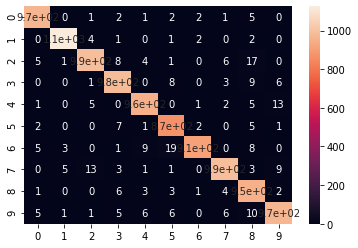

In [34]:
model = Sequential()
model.add(Conv2D(14, kernel_size=(3,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dense(10,activation=tf.nn.softmax))
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

test_model(model)
del model

## Model 2
#### 2x Conv2d 14(3, 3) + MaxPooling(2, 2)

1875/1875 [==============================] - 17s 9ms/step - loss: 0.1654 - accuracy: 0.9498 - val_loss: 0.0686 - val_accuracy: 0.9782

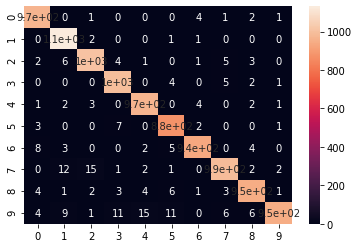

In [35]:
model = Sequential()
model.add(Conv2D(14, kernel_size=(3,3)))
model.add(Conv2D(14, kernel_size=(3,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dense(10,activation=tf.nn.softmax))
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

test_model(model)
del model

## Model 3
#### MaxPooling(2, 2) + Conv2d 14(3, 3) + MaxPooling(2, 2)

1875/1875 [==============================] - 5s 3ms/step - loss: 0.2599 - accuracy: 0.9243 - val_loss: 0.1175 - val_accuracy: 0.9646

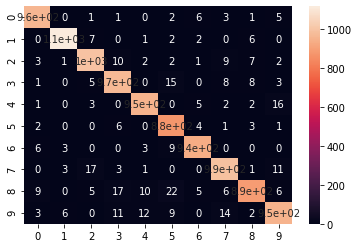

In [36]:
model = Sequential()
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(14, kernel_size=(3,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dense(10,activation=tf.nn.softmax))
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

test_model(model)
del model

## Model 4
#### MaxPooling(2, 2) + 2x Conv2d 14(3, 3) + MaxPooling(2, 2)

1875/1875 [==============================] - 7s 4ms/step - loss: 0.1967 - accuracy: 0.9405 - val_loss: 0.0834 - val_accuracy: 0.9724

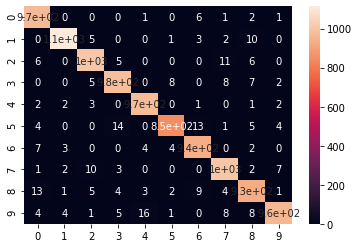

In [37]:
model = Sequential()
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(14, kernel_size=(3,3)))
model.add(Conv2D(14, kernel_size=(3,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dense(10,activation=tf.nn.softmax))
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

test_model(model)
del model

## Model 5
#### Conv2d 28(3, 3) + MaxPooling(2, 2)

1875/1875 [==============================] - 13s 7ms/step - loss: 0.1721 - accuracy: 0.9484 - val_loss: 0.0736 - val_accuracy: 0.9767

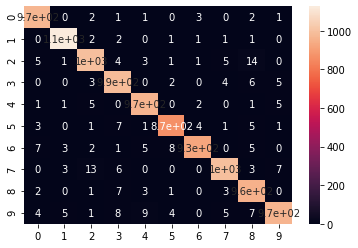

In [38]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dense(10,activation=tf.nn.softmax))
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

test_model(model)
del model

## Model 6
#### 2x Conv2d 28(3, 3) + MaxPooling(2, 2)

1875/1875 [==============================] - 34s 18ms/step - loss: 0.1416 - accuracy: 0.9576 - val_loss: 0.0606 - val_accuracy: 0.9801

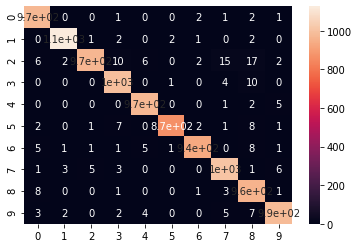

In [39]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3)))
model.add(Conv2D(28, kernel_size=(3,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dense(10,activation=tf.nn.softmax))
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

test_model(model)
del model

## Model 7
#### MaxPooling(2, 2) + Conv2d 28(3, 3) + MaxPooling(2, 2)

1875/1875 [==============================] - 6s 3ms/step - loss: 0.2179 - accuracy: 0.9364 - val_loss: 0.0846 - val_accuracy: 0.9737

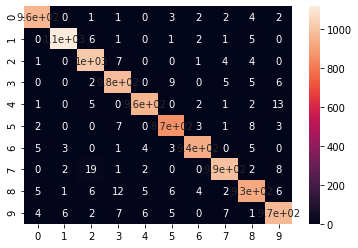

In [40]:
model = Sequential()
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(28, kernel_size=(3,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dense(10,activation=tf.nn.softmax))
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

test_model(model)
del model

## Model 8
#### MaxPooling(2, 2) + 2x Conv2d 28(3, 3) + MaxPooling(2, 2)

1875/1875 [==============================] - 9s 5ms/step - loss: 0.1672 - accuracy: 0.9499 - val_loss: 0.0774 - val_accuracy: 0.9742

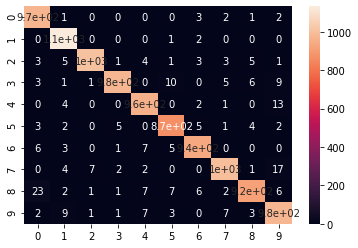

In [41]:
model = Sequential()
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(28, kernel_size=(3,3)))
model.add(Conv2D(28, kernel_size=(3,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dense(10,activation=tf.nn.softmax))
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

test_model(model)
del model

## Model 9
#### Conv2d 14(3, 3) + MaxPooling(2, 2) + Dropout 0.2

1875/1875 [==============================] - 10s 5ms/step - loss: 0.2338 - accuracy: 0.9308 - val_loss: 0.1029 - val_accuracy: 0.9674

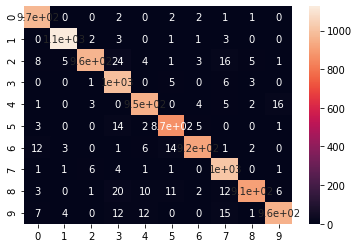

In [42]:
model = Sequential()
model.add(Conv2D(14, kernel_size=(3,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

test_model(model)
del model

## Model 10
#### 2x Conv2d 14(3, 3) + MaxPooling(2, 2) + Dropout 0.2

1875/1875 [==============================] - 20s 11ms/step - loss: 0.1841 - accuracy: 0.9451 - val_loss: 0.0762 - val_accuracy: 0.9763

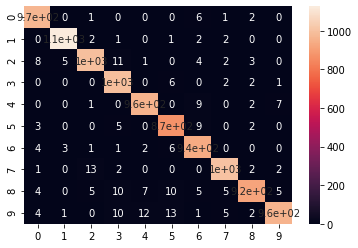

In [43]:
model = Sequential()
model.add(Conv2D(14, kernel_size=(3,3)))
model.add(Conv2D(14, kernel_size=(3,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

test_model(model)
del model

## Model 11
#### MaxPooling(2, 2) + Conv2d 14(3, 3) + MaxPooling(2, 2) + Dropout 0.2

1875/1875 [==============================] - 5s 3ms/step - loss: 0.2735 - accuracy: 0.9195 - val_loss: 0.0973 - val_accuracy: 0.9695

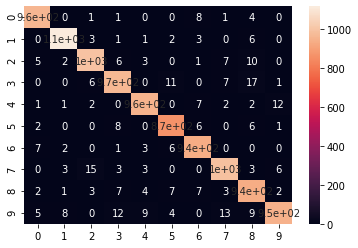

In [44]:
model = Sequential()
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(14, kernel_size=(3,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

test_model(model)
del model

## Model 12
#### MaxPooling(2, 2) + 2x Conv2d 14(3, 3) + MaxPooling(2, 2) + Dropout 0.2

1875/1875 [==============================] - 7s 4ms/step - loss: 0.2231 - accuracy: 0.9331 - val_loss: 0.0838 - val_accuracy: 0.9725

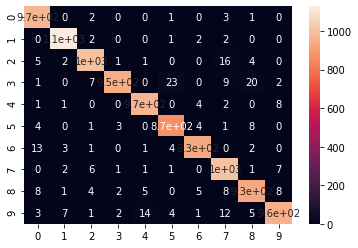

In [45]:
model = Sequential()
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(14, kernel_size=(3,3)))
model.add(Conv2D(14, kernel_size=(3,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

test_model(model)
del model

## Model 13
#### Conv2d 28(3, 3) + MaxPooling(2, 2) + Dropout 0.2

1875/1875 [==============================] - 13s 7ms/step - loss: 0.2136 - accuracy: 0.9346 - val_loss: 0.0851 - val_accuracy: 0.9732

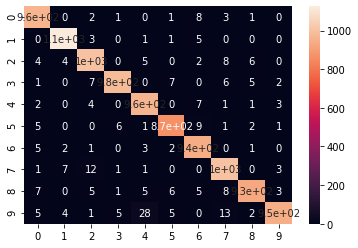

In [46]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

test_model(model)
del model

## Model 14
#### 2x Conv2d 28(3, 3) + MaxPooling(2, 2) + Dropout 0.2

1875/1875 [==============================] - 36s 19ms/step - loss: 0.1728 - accuracy: 0.9468 - val_loss: 0.0628 - val_accuracy: 0.9805

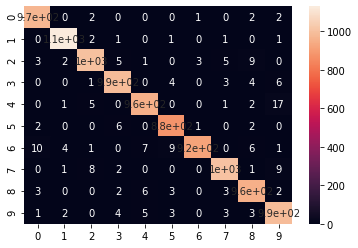

In [47]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3)))
model.add(Conv2D(28, kernel_size=(3,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

test_model(model)
del model

## Model 15
#### MaxPooling(2, 2) + Conv2d 28(3, 3) + MaxPooling(2, 2) + Dropout 0.2

1875/1875 [==============================] - 6s 3ms/step - loss: 0.2563 - accuracy: 0.9216 - val_loss: 0.1025 - val_accuracy: 0.9683

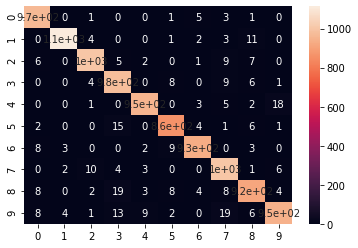

In [48]:
model = Sequential()
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(28, kernel_size=(3,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

test_model(model)
del model

## Model 16
#### MaxPooling(2, 2) + 2x Conv2d 28(3, 3) + MaxPooling(2, 2) + Dropout 0.2

1875/1875 [==============================] - 10s 5ms/step - loss: 0.1865 - accuracy: 0.9428 - val_loss: 0.0657 - val_accuracy: 0.9801

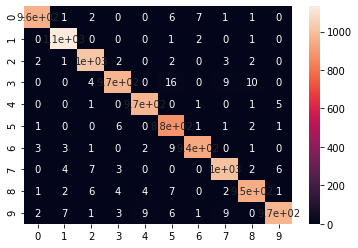

In [49]:
model = Sequential()
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(28, kernel_size=(3,3)))
model.add(Conv2D(28, kernel_size=(3,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

test_model(model)
del model

In [58]:
results = list(zip(model_names, res_val_acc))
results.sort(key=lambda a: a[1], reverse=True)
for i in range(len(results)):
    print('%30s: %.4f' % (results[i][0], results[i][1]))

           2x Conv28 + Drop0.2: 0.9805
                     2x Conv28: 0.9801
     Pol + 2x Conv28 + Drop0.2: 0.9801
                     2x Conv14: 0.9782
                        Conv28: 0.9767
           2x Conv14 + Drop0.2: 0.9763
               Pol + 2x Conv28: 0.9742
                  Pol + Conv28: 0.9737
              Conv28 + Drop0.2: 0.9732
     Pol + 2x Conv14 + Drop0.2: 0.9725
               Pol + 2x Conv14: 0.9724
                        Conv14: 0.9722
        Pol + Conv14 + Drop0.2: 0.9695
        Pol + Conv28 + Drop0.2: 0.9683
              Conv14 + Drop0.2: 0.9674
                  Pol + Conv14: 0.9646


### Best model


In [59]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3)))
model.add(Conv2D(28, kernel_size=(3,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [60]:
model.fit(x=X_train, y=y_train, epochs=10 ,validation_data=(X_test, y_test))
pred_proba = model.predict(X_test)
pred = pred_proba.argmax(axis=1)

Epoch 1/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1760 - accuracy: 0.9461 - val_loss: 0.0682 - val_accuracy: 0.9782

<AxesSubplot:>

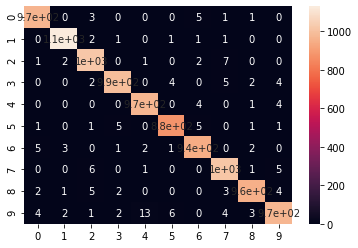

In [61]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True)

### Wrong predictions on MNIST

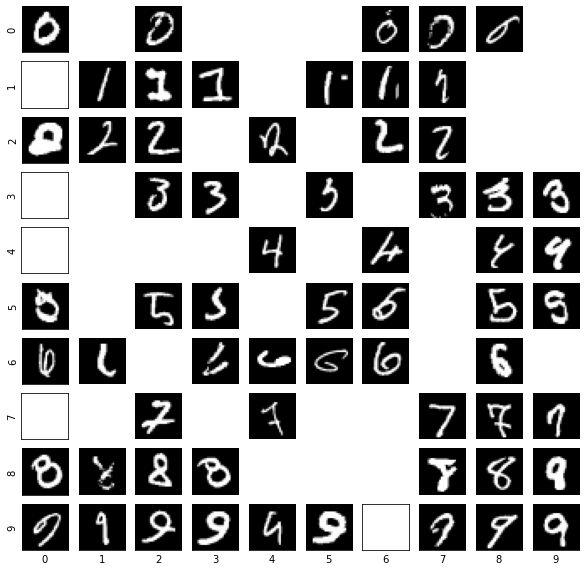

In [62]:
wrong_inds = np.where(pred != y_test)
fig = plt.figure(figsize=(10, 10))
for i in range(10):
    for j in range(10):
        fig.add_subplot(10, 10, 10*i + j + 1)
        if j == 0:
            plt.ylabel(i)
            plt.xticks([])
            plt.yticks([])
        if i == 9:
            plt.xlabel(j)
            plt.xticks([])
            plt.yticks([])
        if i != 9 and j != 0:
            plt.axis('off')
        i_pred_as_j = np.all((pred == j, y_test == i), axis=0)
        if i_pred_as_j.sum() > 0:
            plt.imshow(X_test[i_pred_as_j][pred_proba[i_pred_as_j][:, j].argmax()], cmap="gray")
plt.show()

## MNIST Fashion

In [63]:
model.fit(x=train_images, y=train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 44s 24ms/step - loss: 0.5190 - accuracy: 0.8290 - val_loss: 0.3387 - val_accuracy: 0.8792

In [64]:
pred_proba = model.predict(test_images)
pred = pred_proba.argmax(axis=1)

### Heatmap MNIST Fashion

<AxesSubplot:>

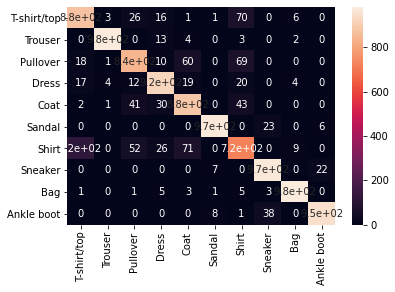

In [65]:
sns.heatmap(confusion_matrix(test_labels, pred), annot=True, xticklabels=labels_description, yticklabels=labels_description)

### Wrong predictions on MNIST Fashion

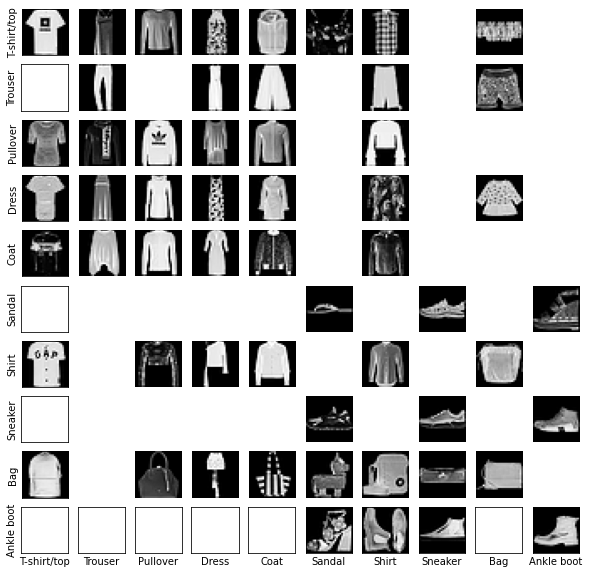

In [66]:
wrong_inds = np.where(pred != test_labels)
fig = plt.figure(figsize=(10, 10))
for i in range(10):
    for j in range(10):
        fig.add_subplot(10, 10, 10*i + j + 1)
        if j == 0:
            plt.ylabel(labels_description[i])
            plt.xticks([])
            plt.yticks([])
        if i == 9:
            plt.xlabel(labels_description[j])
            plt.xticks([])
            plt.yticks([])
        if i != 9 and j != 0:
            plt.axis('off')
        i_pred_as_j = np.all((pred == j, test_labels == i), axis=0)
        if np.any(i_pred_as_j):
            plt.imshow(test_images[i_pred_as_j][pred_proba[i_pred_as_j][:, j].argmax()], cmap="gray")
plt.show()
